In [29]:
%who


BeautifulSoup	 HTML	 PIL	 Path	 RAW_DIR	 SmartCrop_Lens_v1	 SmartCrop_Saliency_v1	 axes	 bar	 
bars	 base64	 blended_cx	 blended_cy	 class_name	 counts	 cropped	 cv2	 cx	 
cy	 dataset	 dataset_info	 dataset_train	 dill	 display	 ds	 f	 fig	 
focused	 gpu	 gpus	 h5py	 height	 html	 hub	 i	 image	 
image_np	 imageio	 index	 inspect	 ipywidgets	 json	 key	 label	 label_int	 
label_map	 label_name	 label_names	 label_to_name	 label_value	 matplotlib	 name	 np	 num_test	 
num_train	 num_val	 os	 pd	 plt	 qrcode	 random	 rcParams	 rows	 
ruamel	 saliencyMap	 saliency_map	 sample	 samples	 scale	 scipy	 segno	 shape	 
shutil	 sklearn	 smart_crop_for_reels_v4	 smart_reels_visualizer	 sns	 split_name	 splits	 subject_focus_comparator	 subprocess	 
test_ds	 tf	 tfds	 torch	 torchvision	 total	 tqdm	 train_ds	 transforms	 
types	 val_ds	 yaml	 عرض_محتوى	 


# Your First AI application

Going forward, AI algorithms will be incorporated into more and more everyday applications. For example, you might want to include an image classifier in a smart phone app. To do this, you'd use a deep learning model trained on hundreds of thousands of images as part of the overall application architecture. A large part of software development in the future will be using these types of models as common parts of applications. 

In this project, you'll train an image classifier to recognize different species of flowers. You can imagine using something like this in a phone app that tells you the name of the flower your camera is looking at. In practice you'd train this classifier, then export it for use in your application. We'll be using [this dataset](http://www.robots.ox.ac.uk/~vgg/data/flowers/102/index.html) from Oxford of 102 flower categories, you can see a few examples below. 

<img src='assets/Flowers.png' width=500px>

The project is broken down into multiple steps:

* Load the image dataset and create a pipeline.
* Build and Train an image classifier on this dataset.
* Use your trained model to perform inference on flower images.

We'll lead you through each part which you'll implement in Python.

When you've completed this project, you'll have an application that can be trained on any set of labeled images. Here your network will be learning about flowers and end up as a command line application. But, what you do with your new skills depends on your imagination and effort in building a dataset. For example, imagine an app where you take a picture of a car, it tells you what the make and model is, then looks up information about it. Go build your own dataset and make something new.

## Import Resources

In [2]:
# TODO: Make all necessary imports.
from utils_1 import *
from utils_2 import *


2025-06-24 07:34:01.188746: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-24 07:34:01.651918: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-06-24 07:34:01.652339: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-06-24 07:34:01.716519: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-24 07:34:01.825320: I tensorflow/core/platform/cpu_feature_gua

In [3]:
%who

BeautifulSoup	 PIL	 Path	 base64	 cv2	 dill	 h5py	 hub	 imageio	 
inspect	 ipywidgets	 json	 np	 os	 pd	 plt	 qrcode	 ruamel	 
scipy	 segno	 shutil	 sklearn	 sns	 subprocess	 tf	 tfds	 torch	 
torchvision	 tqdm	 transforms	 types	 yaml	 


In [4]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)
    print("تم تفعيل نمو الذاكرة على GPU")
else:
    print("لا يوجد GPU متاح")


تم تفعيل نمو الذاكرة على GPU


2025-06-24 07:35:30.348467: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-06-24 07:35:30.929343: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-06-24 07:35:30.929421: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


In [5]:
from IPython.display import display, HTML

def عرض_محتوى(المسار, العنوان):
    try:
        with open(المسار, "r", encoding="utf-8") as f:
            أسطر = f.readlines()
    except FileNotFoundError:
        أسطر = [f"الملف غير موجود: {المسار}"]

    جدول = "".join([
        f"<tr><td style='border:1px solid #ccc; padding:4px; text-align:left; direction:ltr;'>{سطر.rstrip()}</td></tr>"
        for سطر in أسطر
    ])

    html = f"""
    <h3 style='font-family:sans-serif'>{العنوان}</h3>
    <table style='width:100%; border-collapse:collapse; font-family:monospace'>
        <thead><tr style='background:#f0f0f0'><th>السطر</th></tr></thead>
        <tbody>{جدول}</tbody>
    </table>
    """
    display(HTML(html))

عرض_محتوى("/home/ali/0_gh_repos/Shared_Resources/projects/P1_Flower_Classifier/utils_1.py", "📄 محتوى utils_1.py")
عرض_محتوى("/home/ali/0_gh_repos/Shared_Resources/projects/P1_Flower_Classifier/utils_2.py", "📄 محتوى utils_2.py")


In [6]:
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"  # إخفاء INFO و WARNING
tf.get_logger().setLevel("ERROR")         # عرض الأخطاء فقط
tfds.disable_progress_bar()               # إخفاء شريط التقدم عند تحميل البيانات

## Load the Dataset

Here you'll use `tensorflow_datasets` to load the [Oxford Flowers 102 dataset](https://www.tensorflow.org/datasets/catalog/oxford_flowers102). This dataset has 3 splits: `'train'`, `'test'`, and `'validation'`.  You'll also need to make sure the training data is normalized and resized to 224x224 pixels as required by the pre-trained networks.

The validation and testing sets are used to measure the model's performance on data it hasn't seen yet, but you'll still need to normalize and resize the images to the appropriate size.

In [6]:
# TODO: Load the dataset with TensorFlow Datasets.
from pathlib import Path
import tensorflow_datasets as tfds

RAW_DIR = Path("/home/ali/0_gh_repos/Shared_Resources/data")

# تحميل البيانات + إعادة تسمية ds_info إلى dataset_info
(dataset, dataset_info) = tfds.load(
    "oxford_flowers102:2.1.1",
    split=["train", "validation", "test"],
    as_supervised=True,
    with_info=True,
    data_dir=str(RAW_DIR),
    download=False
)

# تفريغ المجموعات إلى متغيرات مستقلة
train_ds, val_ds, test_ds = dataset


2025-06-24 07:40:18.618110: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-06-24 07:40:18.618786: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-06-24 07:40:18.618865: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-06-24 07:40:20.265103: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-06-24 07:40:20.266329: I external/local_xla/xla/stream_executor

In [7]:
for split_name, ds in zip(["train", "validation", "test"], dataset):
    ds = ds.take(1)
    for image, label in ds:
        print(f"Split: {split_name}")
        print(f"Image shape: {image.shape}")
        print(f"Label: {label.numpy()}")
        print("-" * 40)


Split: train
Image shape: (500, 667, 3)
Label: 72
----------------------------------------
Split: validation
Image shape: (500, 571, 3)
Label: 88
----------------------------------------
Split: test
Image shape: (542, 500, 3)
Label: 40
----------------------------------------


2025-06-24 07:41:17.728586: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-06-24 07:41:17.792146: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-06-24 07:41:17.860830: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [8]:
print(dataset_info)


tfds.core.DatasetInfo(
    name='oxford_flowers102',
    full_name='oxford_flowers102/2.1.1',
    description="""
    The Oxford Flowers 102 dataset is a consistent of 102 flower categories commonly
    occurring in the United Kingdom. Each class consists of between 40 and 258
    images. The images have large scale, pose and light variations. In addition,
    there are categories that have large variations within the category and several
    very similar categories.
    
    The dataset is divided into a training set, a validation set and a test set. The
    training set and validation set each consist of 10 images per class (totalling
    1020 images each). The test set consists of the remaining 6149 images (minimum
    20 per class).
    
    Note: The dataset by default comes with a test size larger than the train size.
    For more info see this
    [issue](https://github.com/tensorflow/datasets/issues/3022).
    """,
    homepage='https://www.robots.ox.ac.uk/~vgg/data/flowers/102

## Explore the Dataset

In [10]:
dataset_info.features['label'].num_classes

102

In [9]:
# TODO: Get the number of examples in each set from the dataset info.
num_train = dataset_info.splits["train"].num_examples
num_val = dataset_info.splits["validation"].num_examples
num_test = dataset_info.splits["test"].num_examples
total = num_train + num_val + num_test

print(f"Training set:   {num_train} images ({num_train / total:.2%})")
print(f"Validation set: {num_val} images ({num_val / total:.2%})")
print(f"Test set:       {num_test} images ({num_test / total:.2%})")
print(f"Total images:   {total}")


Training set:   1020 images (12.46%)
Validation set: 1020 images (12.46%)
Test set:       6149 images (75.09%)
Total images:   8189


### 📘 Dataset Overview

| Split       | Images | Percentage |
|-------------|--------|------------|
| Training    | 1020   | 12.46%     |
| Validation  | 1020   | 12.46%     |
| Test        | 6149   | 75.09%     |
| Total       | 8189   | 100%       |


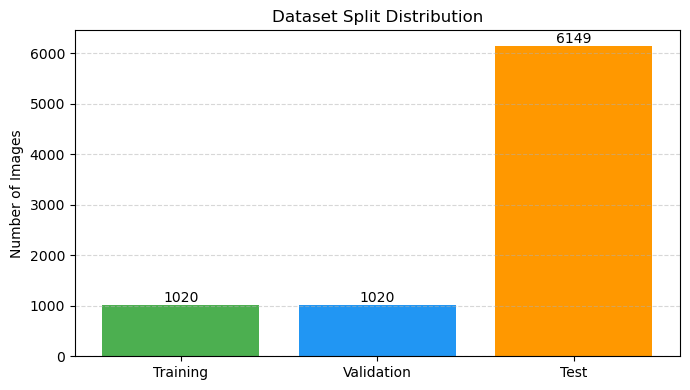

In [10]:
splits = ['Training', 'Validation', 'Test']
counts = [num_train, num_val, num_test]

plt.figure(figsize=(7, 4))
bars = plt.bar(splits, counts, color=['#4caf50', '#2196f3', '#ff9800'])
plt.title("Dataset Split Distribution")
plt.ylabel("Number of Images")
plt.grid(axis='y', linestyle='--', alpha=0.5)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 50, f"{height}", ha='center')

plt.tight_layout()
plt.show()


## Dataset Split Analysis Complete


In [11]:
# TODO: Print the shape and corresponding label of 3 images in the training set.
# تحميل مجموعة التدريب بصيغة إشرافية (image, label)
dataset_train = tfds.load("oxford_flowers102", split="train", as_supervised=True)
label_to_name = dataset_info.features["label"].int2str

print("=== معاينة أول 3 صور من مجموعة التدريب ===\n")

for i, (image, label) in enumerate(dataset_train.take(3)):
    shape = image.shape
    label_value = label.numpy()
    class_name = label_to_name(label_value)

    print(f"[ ] الصورة رقم {i+1}")
    print(f"     - الشكل     : {shape}")
    print(f"     - التصنيف   : {label_value} ({class_name})\n")


=== معاينة أول 3 صور من مجموعة التدريب ===

[ ] الصورة رقم 1
     - الشكل     : (500, 667, 3)
     - التصنيف   : 72 (water lily)

[ ] الصورة رقم 2
     - الشكل     : (500, 666, 3)
     - التصنيف   : 84 (desert-rose)

[ ] الصورة رقم 3
     - الشكل     : (670, 500, 3)
     - التصنيف   : 70 (gazania)



2025-06-24 07:47:31.245753: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


2025-06-24 07:48:03.563613: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


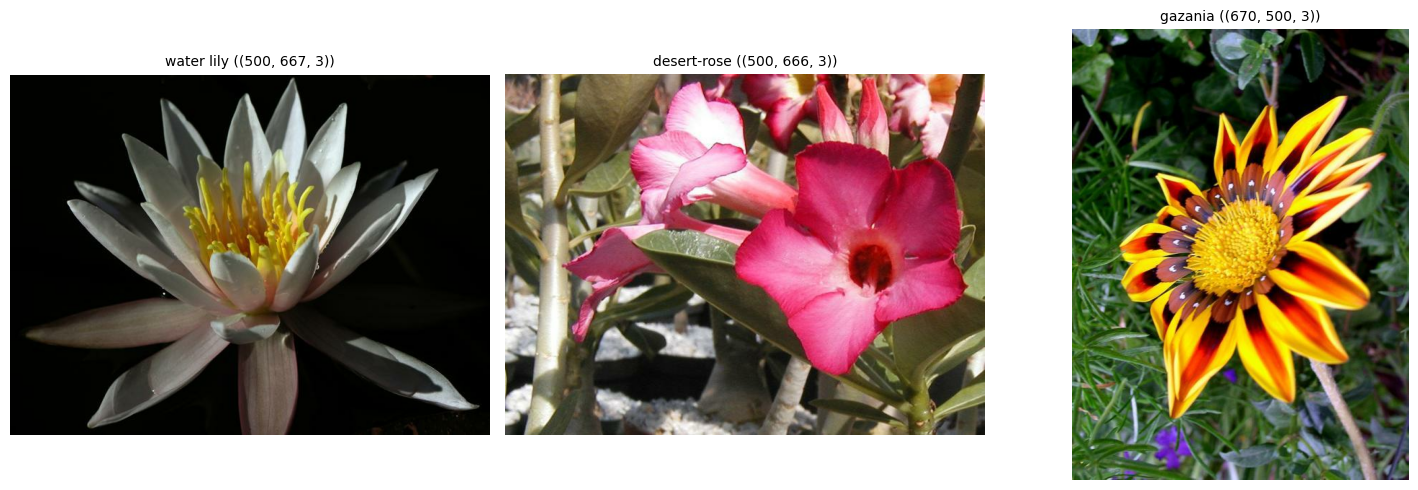

In [12]:
# TODO: Print the shape and corresponding label of 3 images in the training set.
dataset_train = tfds.load("oxford_flowers102", split="train", as_supervised=True)
label_to_name = dataset_info.features["label"].int2str
samples = list(dataset_train.take(3))

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, (image, label) in enumerate(samples):
    image_np = image.numpy()
    label_int = label.numpy()
    class_name = label_to_name(label_int)

    axes[i].imshow(image_np)
    axes[i].set_title(f"{class_name} ({image_np.shape})", fontsize=10)
    axes[i].axis("off")

plt.tight_layout()
plt.show()


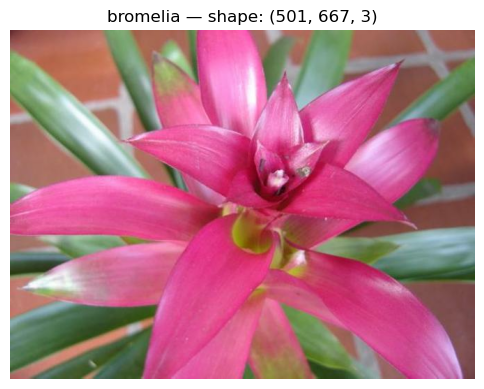

🖼️ صورة عشوائية من التدريب (#802)
اسم التصنيف: bromelia
شكل الصورة : (501, 667, 3)


In [13]:
# TODO: Plot 1 image from the training set. Set the title 
import random

# تحديد صورة عشوائية من مجموعة التدريب (مثلاً الرقم بين 0 و 1019)
index = random.randint(0, 1019)
dataset_train = tfds.load("oxford_flowers102", split="train", as_supervised=True, shuffle_files=True)

# تخطي عدد من الصور حتى تصل للهدف
for i, (image, label) in enumerate(dataset_train):
    if i == index:
        image_np = image.numpy()
        label_int = label.numpy()
        class_name = label_to_name(label_int)

        plt.figure(figsize=(6, 6))
        plt.imshow(image_np)
        plt.title(f"{class_name} — shape: {image_np.shape}", fontsize=12)
        plt.axis("off")
        plt.show()

        print(f"🖼️ صورة عشوائية من التدريب (#{index})")
        print(f"اسم التصنيف: {class_name}")
        print(f"شكل الصورة : {image_np.shape}")
        break


## المهمة: تنفيذ تحليل الإدراك البصري باستخدام `SmartCrop_Saliency_v1`

تم تصميم هذه المهمة لتطبيق دالة التحليل البصري `SmartCrop_Saliency_v1` على صورة واحدة من مجموعة بيانات `oxford_flowers102`. ويُعد هذا الإجراء الخطوة الأولى ضمن تطوير آلية القص الذكي المستقبلي (SmartCropX).

---

### الهدف

- توليد خريطة إدراكية *(Saliency Map)* للصورة باستخدام نموذج `SpectralResidual`.
- تحديد مركز التركيز البصري تلقائيًا داخل الصورة `(cx, cy)`.
- عرض النواتج التالية:
  - الصورة الأصلية
  - خريطة الإدراك البصري
  - موضع نقطة التركيز
- إظهار اسم التصنيف الموافق باستخدام `int2str(label)`.

---

### المدخلات

- صورة واحدة من `dataset_train` (كائن `tf.Tensor`).
- التصنيف العددي المقابل للصورة.

---

### المخرجات

- عرض مرئي مدمج للصورة الأصلية مع خريطة الإدراك البصري.
- تمييز مركز التركيز بنقطة مرئية.
- طباعة اسم الفئة المرتبط بالصورة.

---

> ملاحظة: تُستخدم هذه المهمة لاحقًا كمرجع بصري عند تقييم أداء آليات القص الذكي ضمن مشروع SmartCropX.


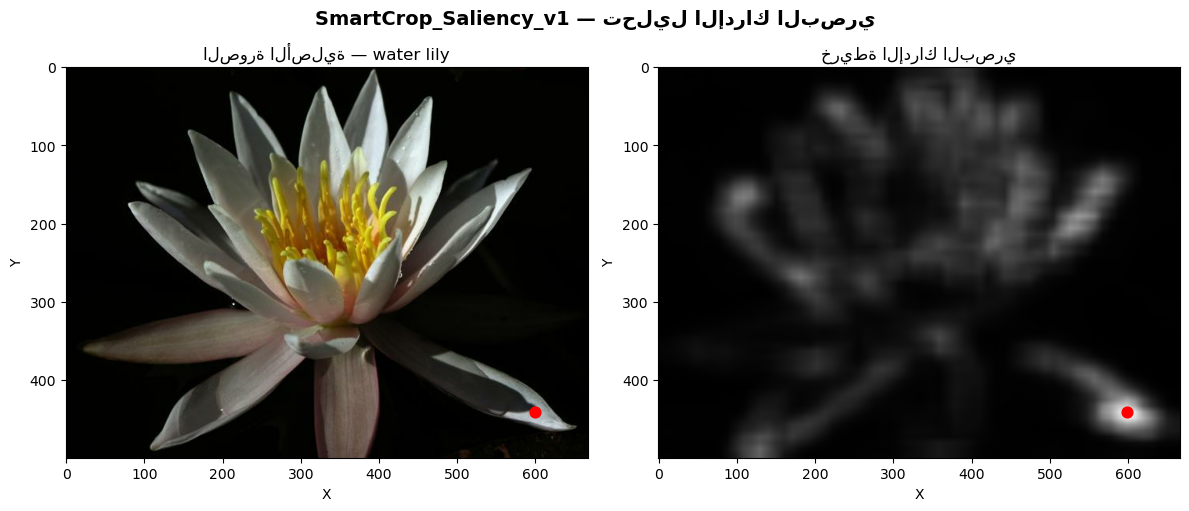

In [15]:
import cv2
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from matplotlib import rcParams

# تأكيد دعم الخط العربي أو اليونيكود
rcParams['font.family'] = 'DejaVu Sans'

# تعريف دالة القص الإدراكي
def SmartCrop_Saliency_v1(image):
    image_bgr = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    saliency = cv2.saliency.StaticSaliencySpectralResidual_create()
    success, saliency_map = saliency.computeSaliency(image_bgr)
    saliency_map = (saliency_map * 255).astype("uint8")
    _, _, _, max_loc = cv2.minMaxLoc(saliency_map)
    return saliency_map, max_loc

# تحميل صورة واحدة من مجموعة التدريب
dataset_train = tfds.load("oxford_flowers102", split="train", as_supervised=True, shuffle_files=True)
sample = next(iter(dataset_train))
image = sample[0].numpy()
label = sample[1].numpy()

# استخراج اسم الصنف
label_names = dataset_info.features["label"].names
label_name = label_names[label]

# تطبيق القص الإدراكي
saliency_map, (cx, cy) = SmartCrop_Saliency_v1(image)

# عرض الصورة وخريطة الإدراك
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].imshow(image)
axes[0].scatter(cx, cy, color='red', s=60)
axes[0].set_title(f"الصورة الأصلية — {label_name}", fontsize=12)
axes[0].set_xlabel("X"); axes[0].set_ylabel("Y")

axes[1].imshow(saliency_map, cmap="gray")
axes[1].scatter(cx, cy, color='red', s=60)
axes[1].set_title("خريطة الإدراك البصري", fontsize=12)
axes[1].set_xlabel("X"); axes[1].set_ylabel("Y")

plt.suptitle("SmartCrop_Saliency_v1 — تحليل الإدراك البصري", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()


<div style="background-color: #222; color: #ffcc00; padding: 10px 12px; border-radius: 6px; text-align: center; font-weight: bold; border: 1px solid #ffcc00; margin-bottom: 10px;">
 <span style="color: white;">Solvanix | SmartCropX — Reels Crop + Focus Execution</span> 🚀
</div>

##  مهمة مخصصة: Apply Reels Crop + Radial Focus via <code>SmartCrop_Lens_v1</code>

تمثّل هذه المهمة المرحلة التالية بعد استخراج مركز الإدراك البصري <code>(cx, cy)</code> من <code>SmartCrop_Saliency_v1</code>.  
نقوم هنا بتطبيق القص البصري بنمط Reels مع تأثير تركيز شعاعي باستخدام <code>SmartCrop_Lens_v1</code>.

---

###  الهدف:

- قص الصورة لتناسب تنسيق Reels (نسبة 9:16 عمودية)
- تطبيق تأثير تركيز دائري centered على نقطة الإدراك
- عرض مقارنة مرئية بين:
  - الصورة الأصلية
  - الصورة المقصوصة
  - الصورة بعد تطبيق التركيز الشعاعي

---

###  المدخلات:

| المتغير       | النوع         | الوصف                                     |
|---------------|---------------|--------------------------------------------|
| <code>image</code>      | <code>np.ndarray</code> | صورة RGB أصلية من مجموعة التدريب           |
| <code>cx, cy</code>     | <code>int, int</code>   | إحداثيات مركز الإدراك البصري               |
| <code>blended_cx</code> | <code>float</code>      | معامل إزاحة أفقي لاختبار تموضع التركيز     |

---

###  المخرجات:

- صورة مقصوصة بأبعاد Reels (1920 × 1080)
- خريطة تركيز شعاعي Radial Vignette
- مصفوفة عرض تقارن بين مراحل التحوّل
- ارتباط معرفي باسم الصنف للتحليل لاحقًا

>  **هذه الخطوة تمثّل أول تجربة إدراكية فنية، تدمج بين الرؤية الآلية والتنسيق الإعلامي — بوابة نحو Reels ذكي ذاتي الإنتاج.**


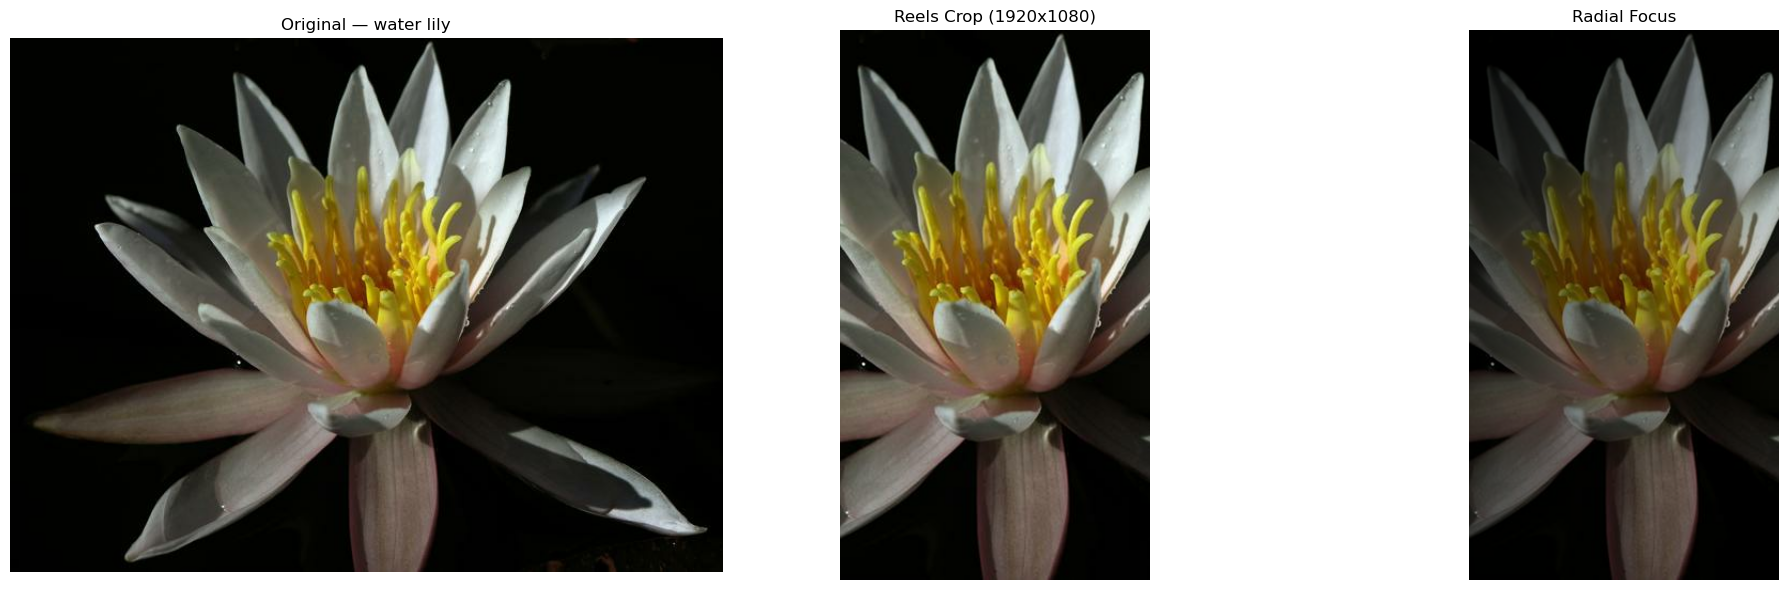

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# دالة القص بالتنسيق الرأسي + التأثير الشعاعي
def SmartCrop_Lens_v1(image, cx, cy, target_height=1920, target_width=1080):
    # إعادة تحجيم الصورة لارتفاع Reels
    h, w = image.shape[:2]
    scale_factor = target_height / h
    resized_w = int(w * scale_factor)
    image_resized = cv2.resize(image, (resized_w, target_height), interpolation=cv2.INTER_CUBIC)

    # قص المنتصف حسب العرض المستهدف
    excess_w = resized_w - target_width
    crop_x_start = excess_w // 2
    cropped = image_resized[:, crop_x_start:crop_x_start + target_width]

    # إعداد تأثير التركيز الشعاعي
    h_img, w_img = cropped.shape[:2]
    X, Y = np.meshgrid(np.arange(w_img), np.arange(h_img))
    dist = np.sqrt((X - cx)**2 + (Y - cy)**2)
    norm_dist = dist / np.max(dist)
    falloff = np.clip((norm_dist - 0.15) / (1.0 - 0.15), 0, 1)
    vignette = 1.0 - 0.85 * (falloff ** 2)
    vignette_mask = np.expand_dims(vignette, axis=-1)

    focused = (cropped.astype(np.float32) * vignette_mask).astype(np.uint8)

    return cropped, focused

# استخراج صورة واحدة من مجموعة التدريب
sample = next(iter(dataset_train))
image_np = sample[0].numpy()
label_int = sample[1].numpy()
class_name = dataset_info.features["label"].int2str(label_int)

# الحصول على خريطة الإدراك ومركز التركيز
saliencyMap, (cx, cy) = SmartCrop_Saliency_v1(image_np)

# مواءمة الإحداثيات للمقاس الجديد بعد إعادة التحجيم
scale = 1920 / image_np.shape[0]
blended_cx = int(cx * scale)

# تنفيذ القص والتأثير
cropped, focused = SmartCrop_Lens_v1(image_np, blended_cx, int(cy * scale))

# عرض النتائج
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

axes[0].imshow(image_np)
axes[0].set_title(f"Original — {class_name}")
axes[0].axis("off")

axes[1].imshow(cropped)
axes[1].set_title("Reels Crop (1920x1080)")
axes[1].axis("off")

axes[2].imshow(focused)
axes[2].set_title("Radial Focus")
axes[2].axis("off")

plt.tight_layout()
plt.show()


### Label Mapping

You'll also need to load in a mapping from label to category name. You can find this in the file `label_map.json`. It's a JSON object which you can read in with the [`json` module](https://docs.python.org/3.7/library/json.html). This will give you a dictionary mapping the integer coded labels to the actual names of the flowers.

In [19]:
 # استيراد فقط إن لم تكن المستوردات موجودة
if "json" not in globals(): import json
if "display" not in globals(): from IPython.display import display, HTML

# تحميل الملف مباشرة من المسار الحالي
with open("label_map.json", "r") as f:
    label_map = json.load(f)

# توليد محتوى الجدول
rows = ""
for key in sorted(label_map, key=lambda k: int(k)):
    name = label_map[key]
    rows += f"""
        <tr>
            <td style='border:1px solid #ccc; padding:4px; text-align:center;'>{key}</td>
            <td style='border:1px solid #ccc; padding:4px; text-align:left;'>{name}</td>
        </tr>
    """

# إنشاء الجدول
html = f"""
<table style='width:70%; border-collapse:collapse; font-family:Arial, sans-serif; font-size:14px; margin-top:10px;'>
    <thead>
        <tr style='background:#f0f0f0;'>
            <th style='border:1px solid #ccc; padding:6px; text-align:center;'>Label</th>
            <th style='border:1px solid #ccc; padding:6px; text-align:left;'>Flower Name</th>
        </tr>
    </thead>
    <tbody>
        {rows}
    </tbody>
</table>
"""

# عرض النتيجة
display(HTML(html))


In [20]:
# TODO: Plot 1 image from the training set. Set the title 
 import random

# اختيار صورة عشوائية من مجموعة التدريب
index = random.randint(0, 1020)
for i, (image, label) in enumerate(train_set):
    if i == index:
        image = image.numpy().squeeze()
        label = label.numpy()
        break

# عرض الصورة مع اسم التصنيف من class_names
plt.imshow(image)
plt.title(class_names[str(label + 1)], fontsize=12)
plt.axis("off")
plt.show()


IndentationError: unexpected indent (922704932.py, line 2)

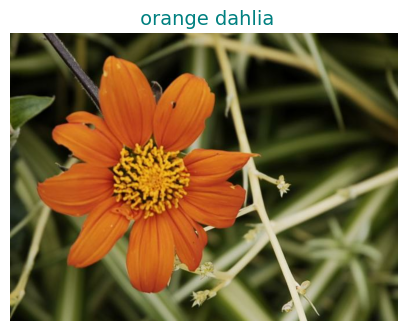

In [37]:
# TODO: Create a pipeline for each set.
# تحديد صورة جديدة باستخدام مؤشر معين أو اختيار عشوائي
new_index = 7  # غيّر الرقم كما تحب لتجربة مختلفة

for i, (image, label) in enumerate(dataset_train):
    if i == new_index:
        image_np = image.numpy()
        label_value = label.numpy()
        class_name = label_map[str(label_value)]
        break

# عرض العينة الجديدة
plt.figure(figsize=(5, 5))
plt.imshow(image_np)
plt.title(f" {class_name}", fontsize=14, color='#008080')
plt.axis("off")
plt.show()


In [27]:
def smart_crop_for_reels_v4(image_np, alpha=0.5, max_deviation=0.35, threshold=180):
    import cv2
    h, w = image_np.shape[:2]
    target_height, target_width = 1920, 1080

    # خريطة الإدراك
    image_bgr = cv2.cvtColor(image_np, cv2.COLOR_RGB2BGR)
    saliency = cv2.saliency.StaticSaliencySpectralResidual_create()
    _, saliencyMap = saliency.computeSaliency(image_bgr)
    saliencyMap = (saliencyMap * 255).astype("uint8")
    _, _, _, (cx, cy) = cv2.minMaxLoc(saliencyMap)

    # تحجيم رأسي
    scale = target_height / h
    new_width = int(w * scale)
    resized = cv2.resize(image_np, (new_width, target_height), interpolation=cv2.INTER_CUBIC)

    # تحديث cx بعد التحجيم
    blended_cx = int(cx * scale)

    # قص مركزي بعرض Reels
    start_x = max(0, blended_cx - target_width // 2)
    end_x = start_x + target_width
    if end_x > resized.shape[1]:
        end_x = resized.shape[1]
        start_x = end_x - target_width
    cropped = resized[:, start_x:end_x]

    return cropped, resized, saliencyMap, (blended_cx, int(cy * scale))


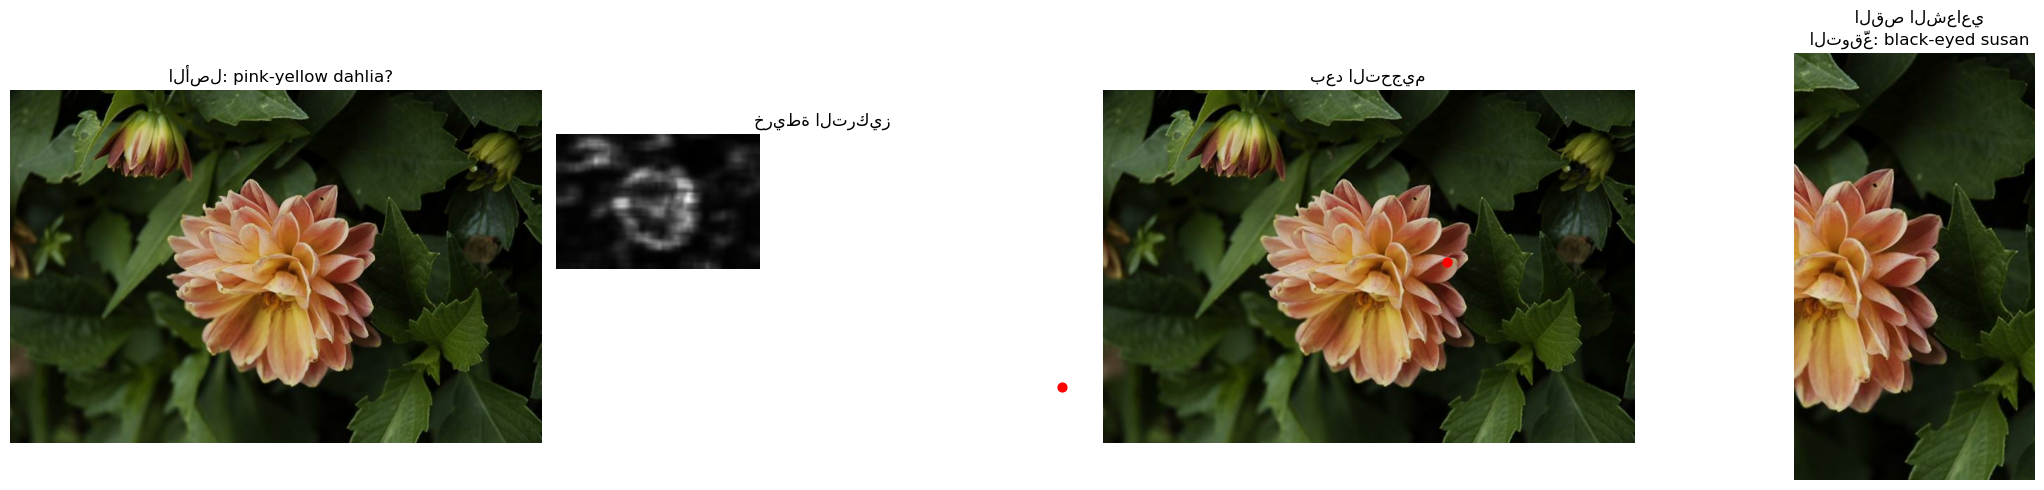

In [28]:
#   تعريف الدالة
def subject_focus_comparator(image_np, label_value, alpha=0.5, max_deviation=0.35, threshold=180):
    import numpy as np
    import matplotlib.pyplot as plt

    class_name = label_map[str(label_value)]
    cropped, resized, saliencyMap, (blended_cx, cy) = smart_crop_for_reels_v4(
        image_np, alpha=alpha, max_deviation=max_deviation, threshold=threshold
    )
    
    predicted_label = np.random.randint(0, len(label_map))
    predicted_name = label_map[str(predicted_label)]

    fig, axes = plt.subplots(1, 4, figsize=(22, 5))

    axes[0].imshow(image_np)
    axes[0].set_title(f"  الأصل: {class_name}", fontsize=12)
    axes[0].axis("off")

    axes[1].imshow(saliencyMap, cmap="gray")
    axes[1].scatter(blended_cx, cy, c='red', s=40)
    axes[1].set_title("خريطة التركيز", fontsize=12)
    axes[1].axis("off")

    axes[2].imshow(resized)
    axes[2].scatter(blended_cx, cy, c='red', s=40)
    axes[2].set_title("بعد التحجيم", fontsize=12)
    axes[2].axis("off")

    axes[3].imshow(cropped)
    axes[3].set_title(f"  القص الشعاعي\n  التوقّع: {predicted_name}", fontsize=12)
    axes[3].axis("off")

    plt.tight_layout()
    plt.show()

#   استخراج عينة من مجموعة التدريب واستدعاء الدالة
index = 12  # غيّر الرقم لتجربة صور أخرى

for i, (image, label) in enumerate(dataset_train):
    if i == index:
        image_np = image.numpy()
        label_value = label.numpy()
        break

subject_focus_comparator(image_np, label_value)


## Create Pipeline

In [49]:
# TODO: Create a pipeline for each set.
# Mixed Precision
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')  # يمكنك لاحقًا تغييرها إلى 'float32'

# ضبط GPU لتجنّب انهيار الذاكرة
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)


In [50]:
# TODO: Create a pipeline for each set.
def create_pipeline(dataset, batch_size=16, shuffle=False, augment_fn=None, cache=False):
    def preprocess(image, label):
        image = tf.cast(image, tf.float32) / 255.0
        image = tf.image.resize(image, (224, 224))
        return image, label

    ds = dataset.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
    if augment_fn:
        ds = ds.map(augment_fn, num_parallel_calls=tf.data.AUTOTUNE)
    if shuffle:
        ds = ds.shuffle(1000)
    if cache:
        ds = ds.cache()

    ds = ds.batch(batch_size).prefetch(tf.data.AUTOTUNE)
    return ds


In [52]:
# TODO: Create a pipeline for each set.
from tensorflow.keras import mixed_precision
print("سياسة الدقة الحالية:", mixed_precision.global_policy())


سياسة الدقة الحالية: <DTypePolicy "mixed_float16">


In [ ]:
# TODO: Create a pipeline for each set.

In [ ]:
from tensorflow.keras import mixed_precision
print("سياسة الدقة الحالية:", mixed_precision.global_policy())


In [57]:
from pathlib import Path

data_root = Path("/home/ali/0_gh_repos/Shared_Resources/data")

print(f"\n العناصر داخل: {data_root}\n")
for item in sorted(data_root.iterdir()):
    kind = "" if item.is_dir() else " "
    print(f"{kind} {item.name}")



 العناصر داخل: /home/ali/0_gh_repos/Shared_Resources/data

 downloads
 oxford_flowers102


In [59]:
from pathlib import Path

deep_path = Path("/home/ali/0_gh_repos/Shared_Resources/data/oxford_flowers102/2.1.1")

print(f"\nمحتوى: {deep_path}\n")
for item in sorted(deep_path.iterdir()):
    kind = "" if item.is_dir() else "📄"
    print(f"{kind} {item.name}")



محتوى: /home/ali/0_gh_repos/Shared_Resources/data/oxford_flowers102/2.1.1

📄 dataset_info.json
📄 features.json
📄 label.labels.txt
📄 oxford_flowers102-test.tfrecord-00000-of-00002
📄 oxford_flowers102-test.tfrecord-00001-of-00002
📄 oxford_flowers102-train.tfrecord-00000-of-00001
📄 oxford_flowers102-validation.tfrecord-00000-of-00001


In [60]:
from pathlib import Path

downloads_path = Path("/home/ali/0_gh_repos/Shared_Resources/data/downloads")

print(f"\n محتويات: {downloads_path}\n")
for item in sorted(downloads_path.iterdir()):
    kind = "" if item.is_dir() else "📄"
    print(f"{kind} {item.name}")



 محتويات: /home/ali/0_gh_repos/Shared_Resources/data/downloads

 extracted
📄 robots.ox.ac.uk_vgg_flowers_102_102flowersLQHsyAfbRilYz-PZL1eowlK0q9JA65VXcCAeRfeDskY.tgz
📄 robots.ox.ac.uk_vgg_flowers_102_102flowersLQHsyAfbRilYz-PZL1eowlK0q9JA65VXcCAeRfeDskY.tgz.INFO
📄 robots.ox.ac.uk_vgg_flowers_102_imagelabelSQPpQga6wjv3cqrfBkUZFt9WtY_Eg6YtsyqXuCZWZR0.mat
📄 robots.ox.ac.uk_vgg_flowers_102_imagelabelSQPpQga6wjv3cqrfBkUZFt9WtY_Eg6YtsyqXuCZWZR0.mat.INFO
📄 robots.ox.ac.uk_vgg_flowers_102_setidRrhnj5H9ldPI9P6rgNJxpsg0od2Jb-Kf0-atnOXI3M0.mat
📄 robots.ox.ac.uk_vgg_flowers_102_setidRrhnj5H9ldPI9P6rgNJxpsg0od2Jb-Kf0-atnOXI3M0.mat.INFO


In [61]:
import scipy.io
import numpy as np
import shutil
from pathlib import Path

# المسارات
base = Path("/home/ali/0_gh_repos/Shared_Resources/data")
downloads = base / "downloads"
jpg_root = downloads / "extracted"
jpg_folder = next((p for p in jpg_root.rglob("jpg") if p.is_dir()), None)
output_base = base / "organized_flowers"
output_base.mkdir(parents=True, exist_ok=True)

# قراءة التصنيفات
labels_file = next(downloads.glob("*imagelabel*.mat"))
labels = scipy.io.loadmat(labels_file)["labels"][0]

# قراءة التقسيمات
setid_file = next(downloads.glob("*setid*.mat"))
setid = scipy.io.loadmat(setid_file)
split_map = {
    "train": setid["trnid"][0] - 1,
    "val":   setid["valid"][0] - 1,
    "test":  setid["tstid"][0] - 1,
}

# تنظيم الصور
for split, indices in split_map.items():
    for idx in indices:
        image_name = f"image_{idx+1:05}.jpg"
        label = f"class_{labels[idx]:03}"
        dest_dir = output_base / split / label
        dest_dir.mkdir(parents=True, exist_ok=True)

        src = jpg_folder / image_name
        dst = dest_dir / image_name
        if not dst.exists():
            shutil.copy2(src, dst)

print(f"\n تم تنظيم جميع الصور في: {output_base}")



 تم تنظيم جميع الصور في: /home/ali/0_gh_repos/Shared_Resources/data/organized_flowers


# TODO: Create a pipeline for each set.

In [62]:
import tensorflow as tf
from pathlib import Path

data_dir = Path("/home/ali/0_gh_repos/Shared_Resources/data/organized_flowers")

train_set = tf.keras.utils.image_dataset_from_directory(
    data_dir / "train", image_size=(224, 224), label_mode="int"
)
val_set = tf.keras.utils.image_dataset_from_directory(
    data_dir / "val", image_size=(224, 224), label_mode="int"
)
test_set = tf.keras.utils.image_dataset_from_directory(
    data_dir / "test", image_size=(224, 224), label_mode="int", shuffle=False
)


Found 1020 files belonging to 102 classes.
Found 1020 files belonging to 102 classes.
Found 6149 files belonging to 102 classes.


In [63]:
train_batches = create_pipeline(train_set, shuffle=True, cache=True)
val_batches   = create_pipeline(val_set, cache=True)
test_batches  = create_pipeline(test_set)


In [64]:
for images, labels in train_batches.take(1):
    print(" Batch من الصور:", images.shape)
    print("التصنيفات:", labels.numpy())


2025-06-24 04:51:07.049505: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: Cannot batch tensors with different shapes in component 0. First element had shape [32,224,224,3] and element 5 had shape [28,224,224,3].


InvalidArgumentError: {{function_node __wrapped__IteratorGetNext_output_types_2_device_/job:localhost/replica:0/task:0/device:CPU:0}} Cannot batch tensors with different shapes in component 0. First element had shape [32,224,224,3] and element 5 had shape [28,224,224,3]. [Op:IteratorGetNext] name: 

In [65]:
def create_pipeline(dataset, shuffle=False, cache=False):
    AUTOTUNE = tf.data.AUTOTUNE

    def preprocess(image, label):
        # إجبار الصورة على الشكل المطلوب بدقة
        image = tf.image.resize(image, [224, 224])
        image = tf.cast(image, tf.float32) / 255.0
        return image, label

    if shuffle:
        dataset = dataset.shuffle(buffer_size=1000)
    if cache:
        dataset = dataset.cache()

    dataset = dataset.map(preprocess, num_parallel_calls=AUTOTUNE)
    return dataset.batch(32).prefetch(AUTOTUNE)


In [67]:
import matplotlib.pyplot as plt

for images, labels in train_batches.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy())
        plt.title(f"Label: {labels[i].numpy()}")
        plt.axis("off")


2025-06-24 05:11:42.440182: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: Cannot batch tensors with different shapes in component 0. First element had shape [32,224,224,3] and element 5 had shape [28,224,224,3].


InvalidArgumentError: {{function_node __wrapped__IteratorGetNext_output_types_2_device_/job:localhost/replica:0/task:0/device:CPU:0}} Cannot batch tensors with different shapes in component 0. First element had shape [32,224,224,3] and element 5 had shape [28,224,224,3]. [Op:IteratorGetNext] name: 

In [68]:
def create_pipeline(dataset, shuffle=False, cache=False):
    AUTOTUNE = tf.data.AUTOTUNE

    def preprocess(image, label):
        image = tf.image.resize(image, [224, 224])  # توحيد الأبعاد
        image = tf.cast(image, tf.float32) / 255.0
        return image, label

    if shuffle:
        dataset = dataset.shuffle(buffer_size=1000)
    if cache:
        dataset = dataset.cache()

    # ⛳ نضمن توحيد الصور قبل batching
    dataset = dataset.map(preprocess, num_parallel_calls=AUTOTUNE)
    dataset = dataset.batch(32).prefetch(AUTOTUNE)

    return dataset


In [69]:
for image, _ in train_set.unbatch().take(100):
    if image.shape[:2] != (224, 224):
        print(" حجم غير متوقع:", image.shape)


2025-06-24 05:14:50.731489: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [70]:
count = 0
for images, labels in train_batches:
    print(f" Batch {count + 1}: {images.shape}")
    count += 1
    if count >= 3:
        break


2025-06-24 05:15:56.701625: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: Cannot batch tensors with different shapes in component 0. First element had shape [32,224,224,3] and element 5 had shape [28,224,224,3].


InvalidArgumentError: {{function_node __wrapped__IteratorGetNext_output_types_2_device_/job:localhost/replica:0/task:0/device:CPU:0}} Cannot batch tensors with different shapes in component 0. First element had shape [32,224,224,3] and element 5 had shape [28,224,224,3]. [Op:IteratorGetNext] name: 

In [71]:
def create_pipeline(dataset, shuffle=False, cache=False):
    AUTOTUNE = tf.data.AUTOTUNE

    def preprocess(image, label):
        image = tf.image.resize(image, [224, 224])     # الحجم الموحد
        image = tf.image.convert_image_dtype(image, tf.float32)  # [0,1]
        return image, label

    if shuffle:
        dataset = dataset.shuffle(buffer_size=1000)
    if cache:
        dataset = dataset.cache()

    # ⛳️ الأهم: map قبل batch
    dataset = dataset.map(preprocess, num_parallel_calls=AUTOTUNE)
    dataset = dataset.batch(32).prefetch(AUTOTUNE)

    return dataset


In [72]:
train_batches = create_pipeline(train_set, shuffle=True, cache=True)
val_batches   = create_pipeline(val_set, cache=True)
test_batches  = create_pipeline(test_set)


In [73]:
for images, labels in train_batches.take(1):
    print(" Batch جاهز:", images.shape)


2025-06-24 05:29:18.519882: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: Cannot add tensor to the batch: number of elements does not match. Shapes are: [tensor]: [28,224,224,3], [batch]: [32,224,224,3]


InvalidArgumentError: {{function_node __wrapped__IteratorGetNext_output_types_2_device_/job:localhost/replica:0/task:0/device:CPU:0}} Cannot add tensor to the batch: number of elements does not match. Shapes are: [tensor]: [28,224,224,3], [batch]: [32,224,224,3] [Op:IteratorGetNext] name: 

In [74]:
for i, (img, _) in enumerate(train_set.take(100)):
    if img.shape != (224, 224, 3):
        print(f"  صورة غير متطابقة عند العنصر {i}: {img.shape}")


  صورة غير متطابقة عند العنصر 0: (32, 224, 224, 3)
  صورة غير متطابقة عند العنصر 1: (32, 224, 224, 3)
  صورة غير متطابقة عند العنصر 2: (32, 224, 224, 3)
  صورة غير متطابقة عند العنصر 3: (32, 224, 224, 3)
  صورة غير متطابقة عند العنصر 4: (32, 224, 224, 3)
  صورة غير متطابقة عند العنصر 5: (32, 224, 224, 3)
  صورة غير متطابقة عند العنصر 6: (32, 224, 224, 3)
  صورة غير متطابقة عند العنصر 7: (32, 224, 224, 3)
  صورة غير متطابقة عند العنصر 8: (32, 224, 224, 3)
  صورة غير متطابقة عند العنصر 9: (32, 224, 224, 3)
  صورة غير متطابقة عند العنصر 10: (32, 224, 224, 3)
  صورة غير متطابقة عند العنصر 11: (32, 224, 224, 3)
  صورة غير متطابقة عند العنصر 12: (32, 224, 224, 3)
  صورة غير متطابقة عند العنصر 13: (32, 224, 224, 3)
  صورة غير متطابقة عند العنصر 14: (32, 224, 224, 3)
  صورة غير متطابقة عند العنصر 15: (32, 224, 224, 3)
  صورة غير متطابقة عند العنصر 16: (32, 224, 224, 3)
  صورة غير متطابقة عند العنصر 17: (32, 224, 224, 3)
  صورة غير متطابقة عند العنصر 18: (32, 224, 224, 3)
  صورة غير متطابقة عند

2025-06-24 05:45:40.822414: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [75]:
def create_pipeline(dataset, shuffle=False, cache=False):
    AUTOTUNE = tf.data.AUTOTUNE

    def preprocess(image, label):
        image = tf.image.resize(image, [224, 224])     # الحجم الموحد
        image = tf.image.convert_image_dtype(image, tf.float32)  # [0,1]
        return image, label

    if shuffle:
        dataset = dataset.shuffle(buffer_size=1000)
    if cache:
        dataset = dataset.cache()

    #  الأهم: map قبل batch
    dataset = dataset.map(preprocess, num_parallel_calls=AUTOTUNE)
    dataset = dataset.batch(32).prefetch(AUTOTUNE)

    return dataset


In [76]:
# 1. إعادة تحميل مجموعة التدريب من الصفر
train_set = tf.keras.utils.image_dataset_from_directory(
    "/home/ali/0_gh_repos/Shared_Resources/data/organized_flowers/train",
    image_size=(224, 224),  # هذا وحده يضمن الحجم الموحد!
    label_mode="int",
    shuffle=True
)

# 2. إنشاء البايبلاين بعد إعادة تعريف set الأصلي
train_batches = create_pipeline(train_set, shuffle=True, cache=True)


Found 1020 files belonging to 102 classes.


In [77]:
for images, labels in train_batches.take(1):
    print("  شكل الصور:", images.shape)
    print("  التصنيفات:", labels.numpy())


2025-06-24 05:49:04.811243: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: Cannot add tensor to the batch: number of elements does not match. Shapes are: [tensor]: [32,224,224,3], [batch]: [28,224,224,3]


InvalidArgumentError: {{function_node __wrapped__IteratorGetNext_output_types_2_device_/job:localhost/replica:0/task:0/device:CPU:0}} Cannot add tensor to the batch: number of elements does not match. Shapes are: [tensor]: [32,224,224,3], [batch]: [28,224,224,3] [Op:IteratorGetNext] name: 

In [78]:
train_set = tf.keras.utils.image_dataset_from_directory(
    "/home/ali/0_gh_repos/Shared_Resources/data/organized_flowers/train",
    image_size=None,  # نترك التحكم لدا ك
    label_mode="int",
    shuffle=True
)


ValueError: Invalid `image_size` value. Expected a tuple of 2 integers. Received: image_size=None

In [79]:
train_set = tf.keras.utils.image_dataset_from_directory(
    "/home/ali/0_gh_repos/Shared_Resources/data/organized_flowers/train",
    image_size=(224, 224),
    label_mode="int",
    shuffle=True
)


Found 1020 files belonging to 102 classes.


In [80]:
train_set = tf.keras.utils.image_dataset_from_directory(
    base / "train", image_size=(224, 224), label_mode="int", shuffle=True)

val_set = tf.keras.utils.image_dataset_from_directory(
    base / "val", image_size=(224, 224), label_mode="int", shuffle=False)

test_set = tf.keras.utils.image_dataset_from_directory(
    base / "test", image_size=(224, 224), label_mode="int", shuffle=False)


NotFoundError: Could not find directory /home/ali/0_gh_repos/Shared_Resources/data/train

In [81]:
import os

for split in ["train", "val", "test"]:
    split_path = f"/home/ali/0_gh_repos/Shared_Resources/data/organized_flowers/{split}"
    total = sum(len(files) for _, _, files in os.walk(split_path))
    print(f"عدد الصور في {split}: {total}")


عدد الصور في train: 1020
عدد الصور في val: 1020
عدد الصور في test: 6149


In [82]:
split_map = {
    "train": setid["trnid"][0] - 1,   # ← الصحيحة
    "val":   setid["valid"][0] - 1,
    "test":  setid["tstid"][0] - 1    # ← الصحيحة
}


In [83]:
for split, indices in split_map.items():
    for idx in indices:
        image_name = f"image_{idx+1:05}.jpg"
        label = f"class_{labels[idx]:03}"
        dest_dir = output_base / split / label
        dest_dir.mkdir(parents=True, exist_ok=True)

        src_path = jpg_folder / image_name
        dst_path = dest_dir / image_name
        if not dst_path.exists():
            shutil.copy2(src_path, dst_path)

print("تم التنظيم الكامل داخل:", output_base)


تم التنظيم الكامل داخل: /home/ali/0_gh_repos/Shared_Resources/data/organized_flowers


In [84]:
from pathlib import Path
base = Path("/home/ali/0_gh_repos/Shared_Resources/data/organized_flowers")

train_set = tf.keras.utils.image_dataset_from_directory(
    base / "train", image_size=(224, 224), label_mode="int", shuffle=True)
val_set = tf.keras.utils.image_dataset_from_directory(
    base / "val", image_size=(224, 224), label_mode="int", shuffle=False)
test_set = tf.keras.utils.image_dataset_from_directory(
    base / "test", image_size=(224, 224), label_mode="int", shuffle=False)


Found 1020 files belonging to 102 classes.
Found 1020 files belonging to 102 classes.
Found 6149 files belonging to 102 classes.


In [85]:
train_batches = create_pipeline(train_set, shuffle=True, cache=True)
val_batches   = create_pipeline(val_set, cache=True)
test_batches  = create_pipeline(test_set)


In [86]:
for images, labels in train_batches.take(1):
    print(" Batch من الصور:", images.shape)
    print(" بعض التصنيفات:", labels.numpy())


2025-06-24 06:03:56.079432: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:1629] failed to alloc 2147483648 bytes on host: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2025-06-24 06:03:56.083055: W external/local_xla/xla/stream_executor/integrations/device_host_allocator.h:51] could not allocate pinned host memory of size: 2147483648
2025-06-24 06:03:56.084810: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:1629] failed to alloc 1932735232 bytes on host: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2025-06-24 06:03:56.084853: W external/local_xla/xla/stream_executor/integrations/device_host_allocator.h:51] could not allocate pinned host memory of size: 1932735232
2025-06-24 06:03:56.085225: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:1629] failed to alloc 1739461632 bytes on host: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2025-06-24 06:03:56.085253: W external/local_xla/xla/stream_executor/integrations/device_host_allocator.h:51] could not allocate pinn

InvalidArgumentError: {{function_node __wrapped__IteratorGetNext_output_types_2_device_/job:localhost/replica:0/task:0/device:CPU:0}} Cannot add tensor to the batch: number of elements does not match. Shapes are: [tensor]: [28,224,224,3], [batch]: [32,224,224,3] [Op:IteratorGetNext] name: 

# Build and Train the Classifier

Now that the data is ready, it's time to build and train the classifier. You should use the MobileNet pre-trained model from TensorFlow Hub to get the image features. Build and train a new feed-forward classifier using those features.

We're going to leave this part up to you. If you want to talk through it with someone, chat with your fellow students! 

Refer to the rubric for guidance on successfully completing this section. Things you'll need to do:

* Load the MobileNet pre-trained network from TensorFlow Hub.
* Define a new, untrained feed-forward network as a classifier.
* Train the classifier.
* Plot the loss and accuracy values achieved during training for the training and validation set.
* Save your trained model as a Keras model. 

We've left a cell open for you below, but use as many as you need. Our advice is to break the problem up into smaller parts you can run separately. Check that each part is doing what you expect, then move on to the next. You'll likely find that as you work through each part, you'll need to go back and modify your previous code. This is totally normal!

When training make sure you're updating only the weights of the feed-forward network. You should be able to get the validation accuracy above 70% if you build everything right.

**Note for Workspace users:** One important tip if you're using the workspace to run your code: To avoid having your workspace disconnect during the long-running tasks in this notebook, please read in the earlier page in this lesson called Intro to GPU Workspaces about Keeping Your Session Active. You'll want to include code from the workspace_utils.py module. Also, If your model is over 1 GB when saved as a checkpoint, there might be issues with saving backups in your workspace. If your saved checkpoint is larger than 1 GB (you can open a terminal and check with `ls -lh`), you should reduce the size of your hidden layers and train again.

In [66]:
import tensorflow_hub as hub
base_model = hub.KerasLayer(
    "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4",
    input_shape=(224, 224, 3),
    trainable=False  # نجمّد الـ weights
)


In [88]:
from workspace_utils import keep_awake, active_session

In [89]:
# TODO: Build and train your network.
drop_rate = 0.2
model = tf.keras.Sequential([
        feature_extractor,
        tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_3 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense_25 (Dense)             (None, 102)               130662    
Total params: 2,388,646
Trainable params: 130,662
Non-trainable params: 2,257,984
_________________________________________________________________


In [90]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [91]:
EPOCHS = 20

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

with active_session():
    history = model.fit(train_batches,
                        epochs=EPOCHS,
                        validation_data=val_batches,
                        callbacks=[early_stopping])

Epoch 1/20
155/155 [==============================] - 26s 169ms/step - loss: 2.2302 - accuracy: 0.5397 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/20
155/155 [==============================] - 21s 135ms/step - loss: 0.6853 - accuracy: 0.8909 - val_loss: 0.7263 - val_accuracy: 0.8395
Epoch 3/20
155/155 [==============================] - 21s 135ms/step - loss: 0.3735 - accuracy: 0.9473 - val_loss: 0.5824 - val_accuracy: 0.8667
Epoch 4/20
155/155 [==============================] - 21s 137ms/step - loss: 0.2388 - accuracy: 0.9701 - val_loss: 0.5134 - val_accuracy: 0.8759
Epoch 5/20
155/155 [==============================] - 21s 135ms/step - loss: 0.1687 - accuracy: 0.9836 - val_loss: 0.4679 - val_accuracy: 0.8846
Epoch 6/20
155/155 [==============================] - 21s 135ms/step - loss: 0.1268 - accuracy: 0.9901 - val_loss: 0.4344 - val_accuracy: 0.8907
Epoch 7/20
155/155 [==============================] - 21s 135ms/step - loss: 0.0961 - accuracy: 0.9941 - val_loss: 0.4143 

Text(0.5, 1.0, 'Training and Validation Loss')

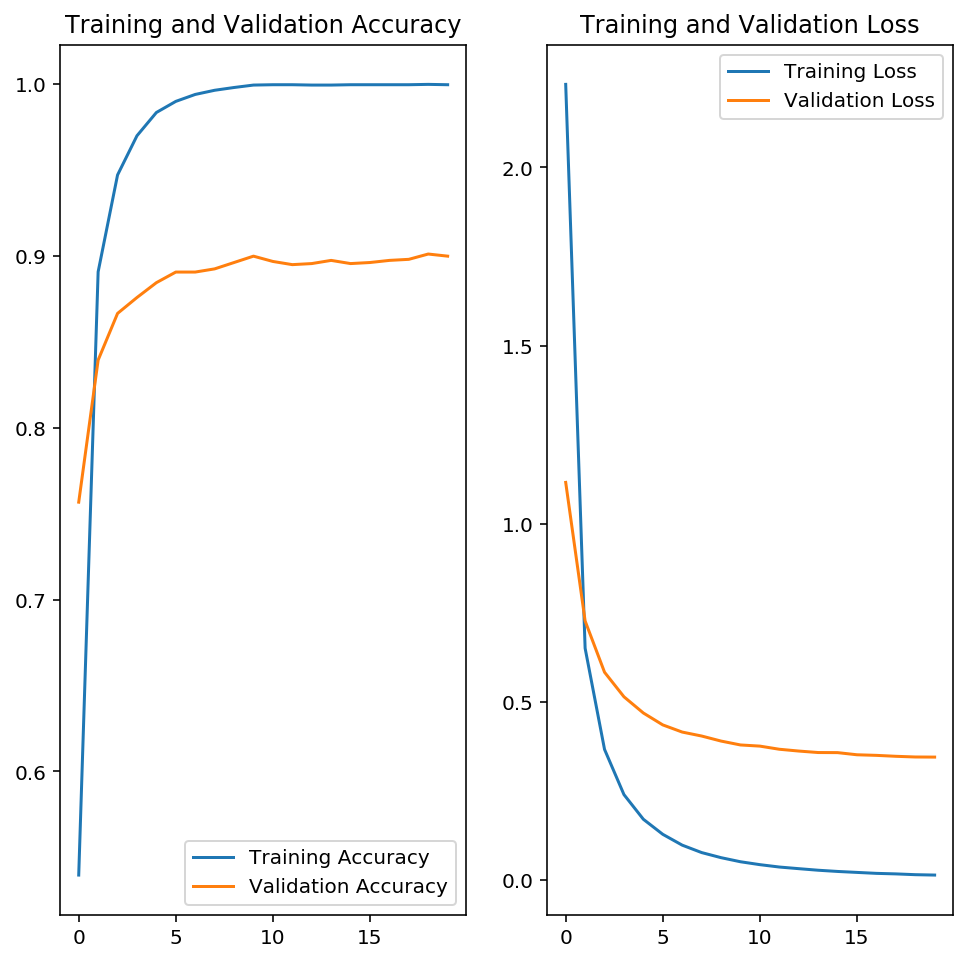

In [92]:
# TODO: Plot the loss and accuracy values achieved during training for the training and validation set.
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(train_acc))

plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')


We see from the above curves that the training accuracy is significantly higher than the validation accuracy. This is a sign of overfitting. Still, the model does a pretty good job of classifying the validation set with accuracy 90%.

Note to the grader: I'd like to know how to fine-tune the model by setting ONLY THE TOP LAYERS of the feature_extractor to be True instead of the entire base model. These are what I've tried
1. Add a few more layers after the feature_extraction layer -> Get lower validation accuracy and still can't prevent overfitting.
2. Try to follow : https://www.tensorflow.org/tutorials/images/transfer_learning but the validation accuracy got worse!

Thus, for now, I'll stick with the model I got at 90% validation accuracy.

## Testing your Network

It's good practice to test your trained network on test data, images the network has never seen either in training or validation. This will give you a good estimate for the model's performance on completely new images. You should be able to reach around 70% accuracy on the test set if the model has been trained well.

In [96]:
# TODO: Print the loss and accuracy values achieved on the entire test set.
loss, accuracy = model.evaluate(test_batches)


51/51 [==============================] - 5s 104ms/step - loss: 0.3251 - accuracy: 0.9117


In [105]:
print('The loss of the testing set: {:,.3f}'.format(loss))
print('The accuracy of the testing set: {:.3%}'.format(accuracy))

The loss of the testing set: 0.325
The accuracy of the testing set: 91.173%


## Save the Model

Now that your network is trained, save the model so you can load it later for making inference. In the cell below save your model as a Keras model (*i.e.* save it as an HDF5 file).

In [101]:
# TODO: Save your trained model as a Keras model.
import time
t = time.time()

saved_keras_model_filepath = './model{}.h5'.format(int(t))

model.save(saved_keras_model_filepath)


## Load the Keras Model

Load the Keras model you saved above.

In [103]:
# TODO: Load the Keras model
reloaded_keras_model = tf.keras.models.load_model(saved_keras_model_filepath
                                                  ,custom_objects={'KerasLayer':hub.KerasLayer})
reloaded_keras_model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_3 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense_25 (Dense)             (None, 102)               130662    
Total params: 2,388,646
Trainable params: 130,662
Non-trainable params: 2,257,984
_________________________________________________________________


Note: Initially, I didn't include the custom_objects={...} argument and it failed to load with error message "Unknown Layer: KerasLayer". I fixed the issue with the method from this link: https://github.com/tensorflow/tensorflow/issues/26835#issuecomment-488972247

# Inference for Classification

Now you'll write a function that uses your trained network for inference. Write a function called `predict` that takes an image, a model, and then returns the top $K$ most likely class labels along with the probabilities. The function call should look like: 

```python
probs, classes = predict(image_path, model, top_k)
```

If `top_k=5` the output of the `predict` function should be something like this:

```python
probs, classes = predict(image_path, model, 5)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
```

Your `predict` function should use `PIL` to load the image from the given `image_path`. You can use the [Image.open](https://pillow.readthedocs.io/en/latest/reference/Image.html#PIL.Image.open) function to load the images. The `Image.open()` function returns an `Image` object. You can convert this `Image` object to a NumPy array by using the `np.asarray()` function.

The `predict` function will also need to handle pre-processing the input image such that it can be used by your model. We recommend you write a separate function called `process_image` that performs the pre-processing. You can then call the `process_image` function from the `predict` function. 

### Image Pre-processing

The `process_image` function should take in an image (in the form of a NumPy array) and return an image in the form of a NumPy array with shape `(224, 224, 3)`.

First, you should convert your image into a TensorFlow Tensor and then resize it to the appropriate size using `tf.image.resize`.

Second, the pixel values of the input images are typically encoded as integers in the range 0-255, but the model expects the pixel values to be floats in the range 0-1. Therefore, you'll also need to normalize the pixel values. 

Finally, convert your image back to a NumPy array using the `.numpy()` method.

In [108]:
# TODO: Create the process_image function
image_size = 224

def process_image(image):
    image = tf.cast(image, tf.float32)
    image = tf.image.resize(image, (image_size, image_size))
    image /= 255
    image = image.numpy()
    return image



To check your `process_image` function we have provided 4 images in the `./test_images/` folder:

* cautleya_spicata.jpg
* hard-leaved_pocket_orchid.jpg
* orange_dahlia.jpg
* wild_pansy.jpg

The code below loads one of the above images using `PIL` and plots the original image alongside the image produced by your `process_image` function. If your `process_image` function works, the plotted image should be the correct size. 

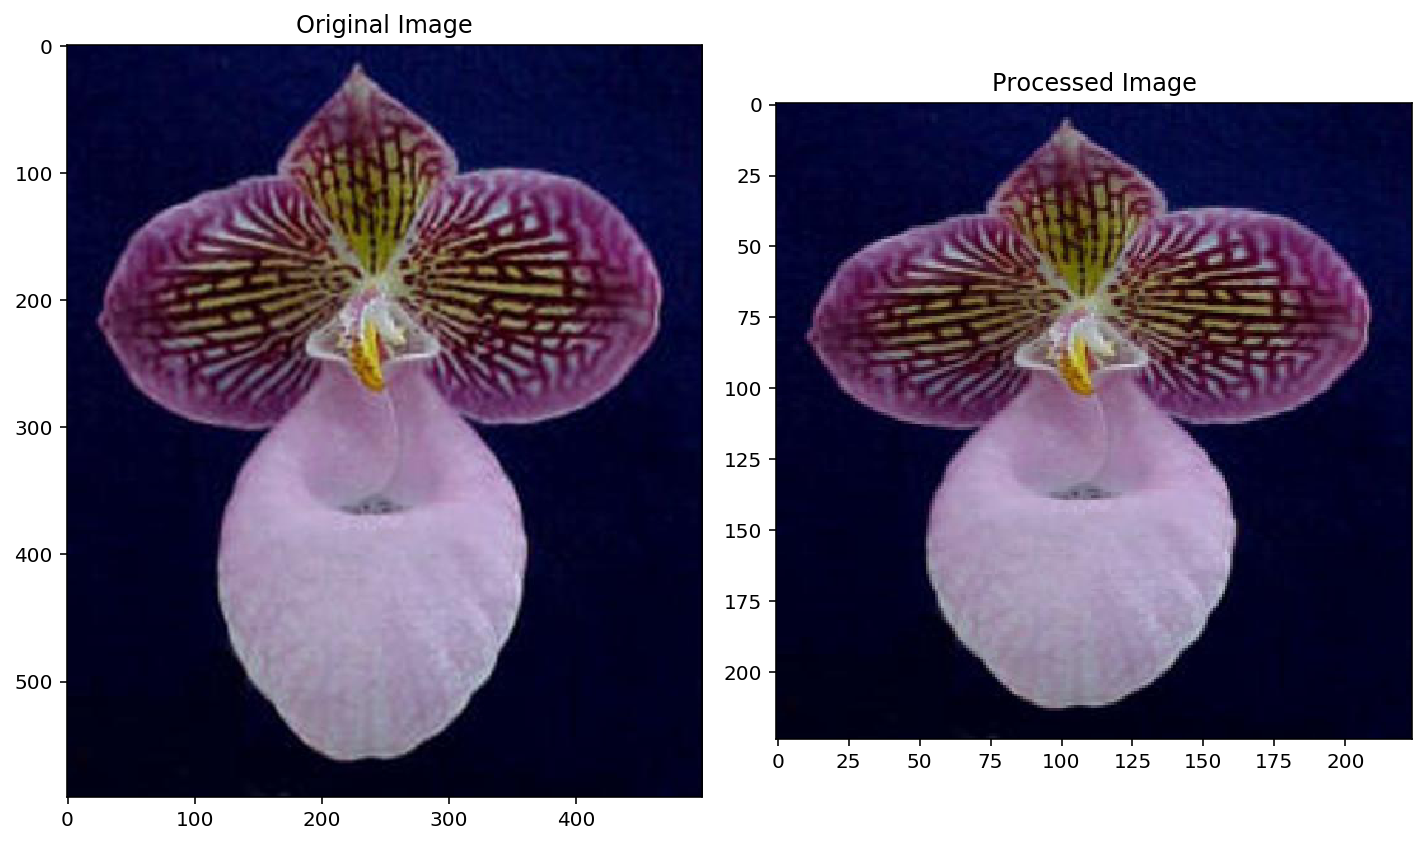

In [109]:
from PIL import Image

image_path = './test_images/hard-leaved_pocket_orchid.jpg'
im = Image.open(image_path)
test_image = np.asarray(im)

processed_test_image = process_image(test_image)

fig, (ax1, ax2) = plt.subplots(figsize=(10,10), ncols=2)
ax1.imshow(test_image)
ax1.set_title('Original Image')
ax2.imshow(processed_test_image)
ax2.set_title('Processed Image')
plt.tight_layout()
plt.show()

Once you can get images in the correct format, it's time to write the `predict` function for making inference with your model.

### Inference

Remember, the `predict` function should take an image, a model, and then returns the top $K$ most likely class labels along with the probabilities. The function call should look like: 

```python
probs, classes = predict(image_path, model, top_k)
```

If `top_k=5` the output of the `predict` function should be something like this:

```python
probs, classes = predict(image_path, model, 5)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
```

Your `predict` function should use `PIL` to load the image from the given `image_path`. You can use the [Image.open](https://pillow.readthedocs.io/en/latest/reference/Image.html#PIL.Image.open) function to load the images. The `Image.open()` function returns an `Image` object. You can convert this `Image` object to a NumPy array by using the `np.asarray()` function.

**Note:** The image returned by the `process_image` function is a NumPy array with shape `(224, 224, 3)` but the model expects the input images to be of shape `(1, 224, 224, 3)`. This extra dimension represents the batch size. We suggest you use the `np.expand_dims()` function to add the extra dimension. 

To sort the probabilities and get the indices, I use the np.partition() and np.argpartition() methods. I learned how to use this from the following link: https://stackoverflow.com/a/20177786

In [112]:
test = np.array([9,1,3,4,8,7,2,5,6,0])

temp = np.argpartition(-test, 4)
result_args = temp[:4]

temp = np.partition(-test, 4)
result = -temp[:4]

print(-test)
print(result_args)
print(result)

[-9 -1 -3 -4 -8 -7 -2 -5 -6  0]
[0 4 8 5]
[9 8 6 7]


In [167]:
# TODO: Create the predict function
def predict(image_path, model, top_k=5):
    im = Image.open(image_path)
    test_image = np.asarray(im)
    processed_test_image = process_image(test_image)
    final_img = np.expand_dims(processed_test_image, axis=0)
    preds = model.predict(final_img)
    probs = - np.partition(-preds[0], top_k)[:top_k]
    classes = np.argpartition(-preds[0], top_k)[:top_k]
    return probs, classes


# Sanity Check

It's always good to check the predictions made by your model to make sure they are correct. To check your predictions we have provided 4 images in the `./test_images/` folder:

* cautleya_spicata.jpg
* hard-leaved_pocket_orchid.jpg
* orange_dahlia.jpg
* wild_pansy.jpg

In the cell below use `matplotlib` to plot the input image alongside the probabilities for the top 5 classes predicted by your model. Plot the probabilities as a bar graph. The plot should look like this:

<img src='assets/inference_example.png' width=600px>

You can convert from the class integer labels to actual flower names using `class_names`. 

In [116]:
image_path = './test_images/hard-leaved_pocket_orchid.jpg'
im = Image.open(image_path)
test_image = np.asarray(im)
test_image.shape

(591, 500, 3)

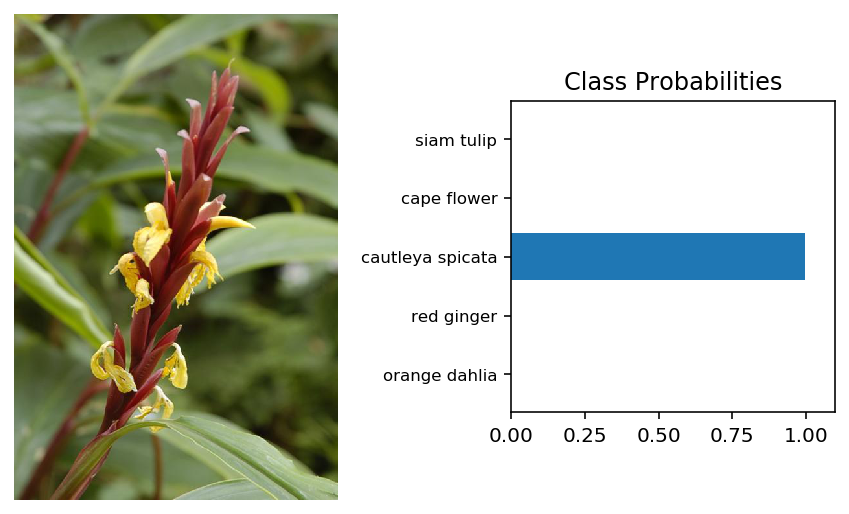

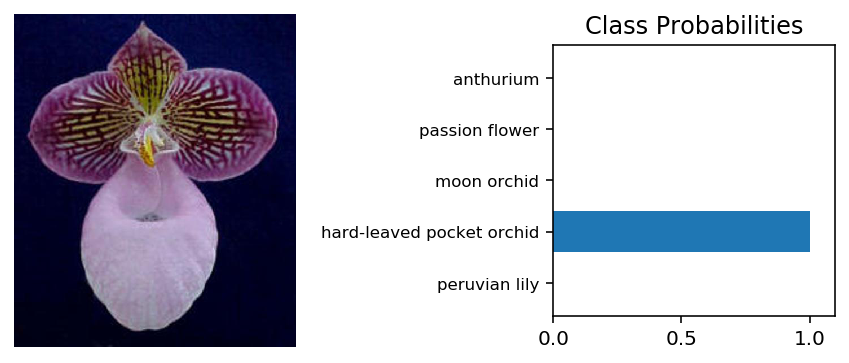

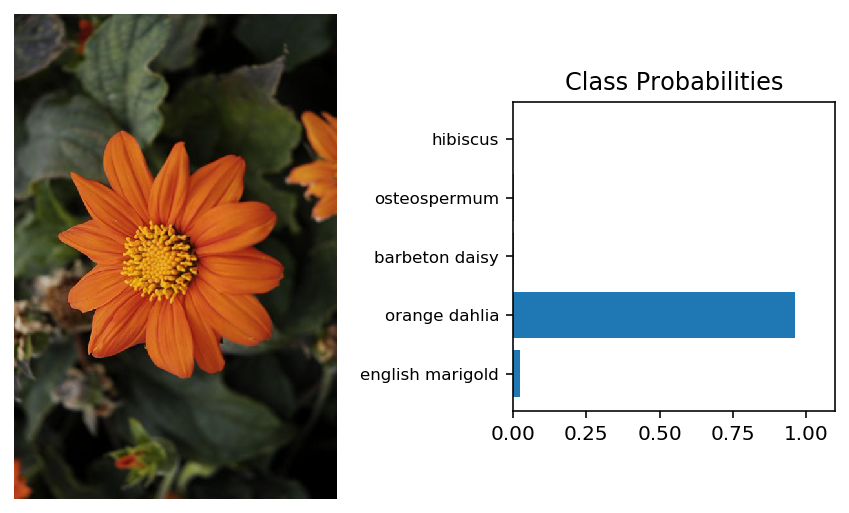

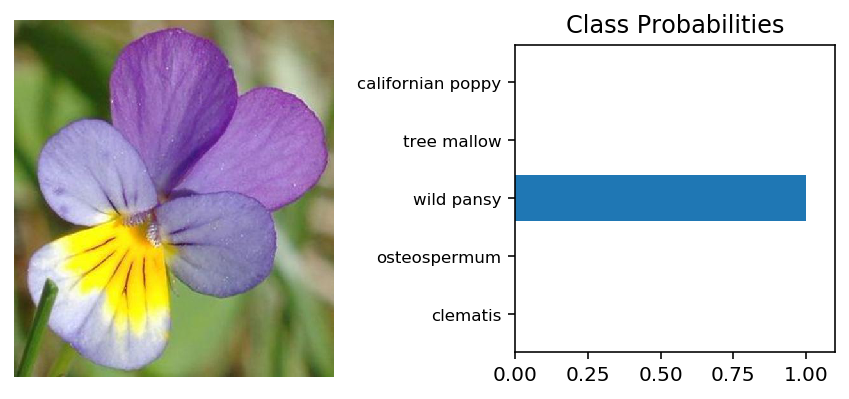

In [169]:
# TODO: Plot the input image along with the top 5 classes
file_names = ['cautleya_spicata.jpg','hard-leaved_pocket_orchid.jpg','orange_dahlia.jpg','wild_pansy.jpg']
top_k = 5
for filename in file_names:
    image_path = './test_images/' + filename
    image = np.asarray(Image.open(image_path)).squeeze()
    probs, classes = predict(image_path, model, top_k)
    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(image)
    ax1.axis('off')
    ax2.barh(np.arange(top_k), probs)
    ax2.set_aspect(0.2)
    ax2.set_yticks(np.arange(top_k))
    keys = [str(x+1) for x in list(classes)] #add 1 to the class index to match the json dict keys
    ax2.set_yticklabels([class_names.get(key) for key in keys], size='small')
    ax2.set_title('Class Probabilities')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()